# Analisis Perbandingan Metode Data Mining untuk Memprediksi Prestasi Akademik Mahasiswa

## Pemahaman Dataset dan Tujuan Penelitian

### Deskripsi Dataset

Penelitian ini menggunakan Student Performance Dataset yang bersumber dari dataset [Kaggle bernama Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset). Dataset ini terdiri dari `5.000 baris` data dan `21 kolom`, yang mencakup informasi komprehensif tentang performa akademik, kebiasaan belajar, faktor psikologis, dan latar belakang sosial-ekonomi mahasiswa. 

### Tujuan Penelitian

Penelitian ini bertujuan untuk memprediksi `Total_Score` mahasiswa menggunakan lima metode regresi berbasis data mining, yaitu `Linear Regression`, `Ridge Regression`, `Random Forest Regressor`, `Gradient Boosting Regressor (XGBoost)`, dan `Support Vector Regression (SVR)`. Tujuan spesifik meliputi:

- Mengembangkan model prediktif untuk memperkirakan Total_Score berdasarkan fitur akademik, perilaku, psikologis, dan sosial-ekonomi.
- Membandingkan performa kelima metode regresi berdasarkan metrik evaluasi seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R² Score untuk menentukan model yang paling akurat dan efisien.
- Mengidentifikasi fitur utama yang paling memengaruhi Total_Score, seperti kehadiran (Attendance), nilai ujian tengah semester (Midterm_Score), atau jam belajar per minggu (Study_Hours_per_Week), untuk memberikan wawasan bagi institusi pendidikan dalam mendukung performa mahasiswa.

### Konteks dan Relevansi

Prediksi performa akademik mahasiswa memiliki nilai praktis yang tinggi, terutama untuk institusi pendidikan dalam mengidentifikasi faktor-faktor yang memengaruhi keberhasilan akademik dan merancang intervensi yang tepat, seperti program bimbingan atau dukungan belajar. Dengan membandingkan berbagai metode regresi, penelitian ini juga bertujuan untuk memberikan rekomendasi model terbaik yang dapat diimplementasikan dalam skenario dunia nyata, sekaligus memahami kelebihan dan keterbatasan masing-masing metode dalam konteks dataset ini.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [3]:
data = pd.read_csv('dataset/enhanced_student_habits_performance_dataset.csv')

## Informasi dasar dataset

In [4]:

print("=== Informasi Dasar Dataset ===")
data.info()

=== Informasi Dasar Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_educa

In [5]:
print("\n=== 5 Baris Pertama Dataset ===")
data.head()


=== 5 Baris Pertama Dataset ===


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [6]:
print("\n=== Statistik Deskriptif ===")
data.describe()


=== Statistik Deskriptif ===


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,139999.500000,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,23094.155105,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,100000.000000,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,119999.750000,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,139999.500000,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,159999.250000,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,179999.000000,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


In [7]:
print("\n=== Jumlah Nilai Unik per Kolom ===")
data.nunique()


=== Jumlah Nilai Unik per Kolom ===


student_id                       80000
age                                 13
gender                               3
major                                6
study_hours_per_day              13364
social_media_hours                  51
netflix_hours                       41
part_time_job                        2
attendance_percentage              601
sleep_hours                         81
diet_quality                         3
exercise_frequency                   8
parental_education_level             5
internet_quality                     3
mental_health_rating               100
extracurricular_participation        2
previous_gpa                       220
semester                             8
stress_level                        91
dropout_risk                         2
social_activity                      6
screen_time                        198
study_environment                    5
access_to_tutoring                   2
family_income_range                  3
parental_support_level   

In [9]:
print("\n=== Jumlah Nilai Hilang per Kolom ===")
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


=== Jumlah Nilai Hilang per Kolom ===


Series([], dtype: int64)

## Identifikasi Kolom Numerik dan Kategorikal

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\n=== Kolom Numerik ===")
print(numerical_cols)
print("\n=== Kolom Kategorikal ===")
print(categorical_cols)


=== Kolom Numerik ===
['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']

=== Kolom Kategorikal ===
['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']


## Distribusi Variabel Target (exam_score)

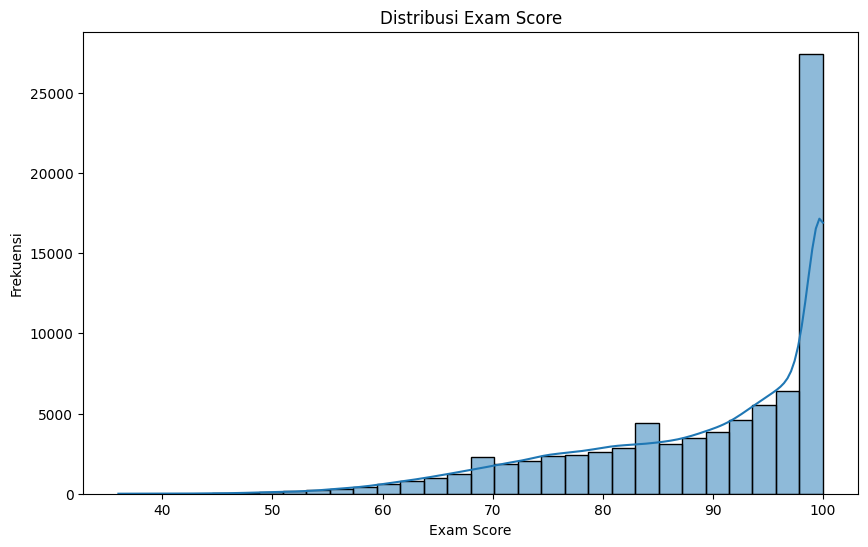

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['exam_score'], kde=True, bins=30)
plt.title('Distribusi Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frekuensi')
plt.show()

## Distribusi Kolom Numerik

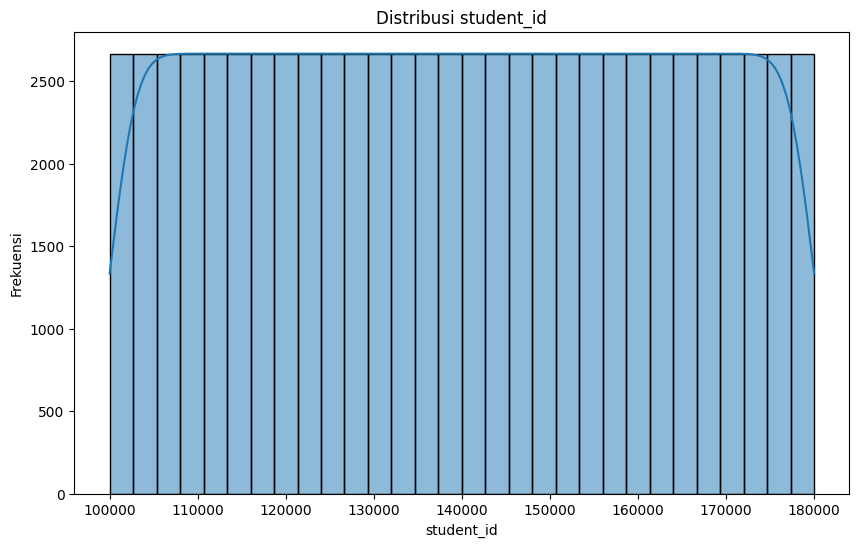

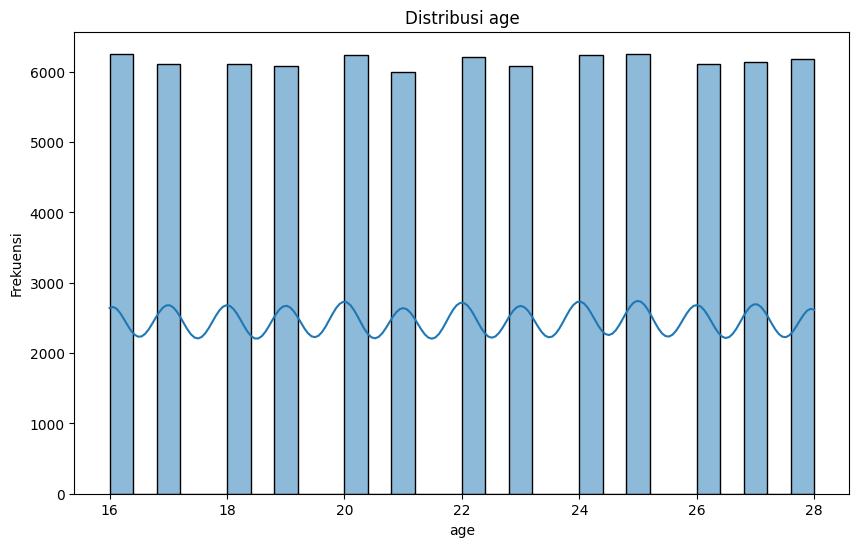

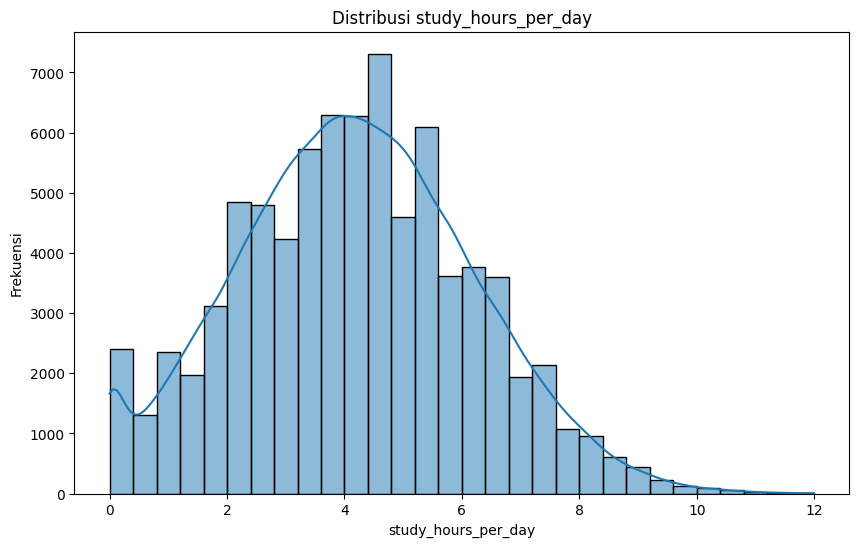

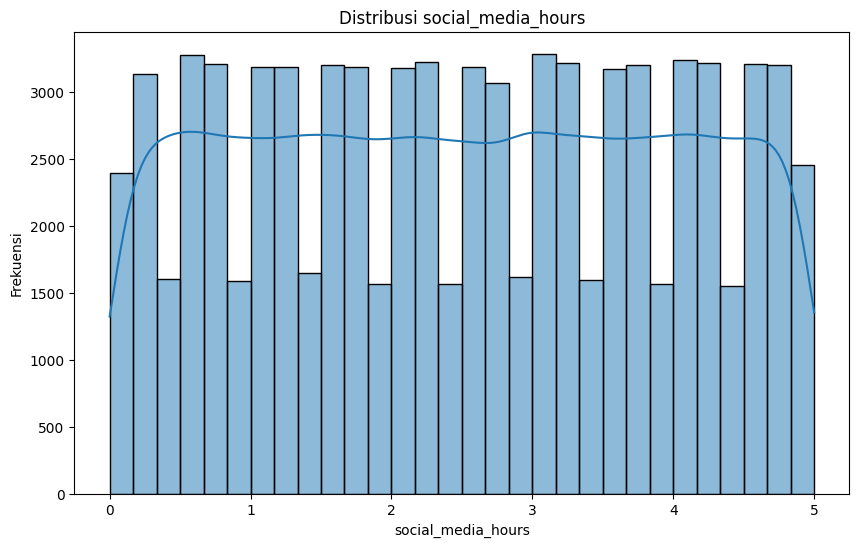

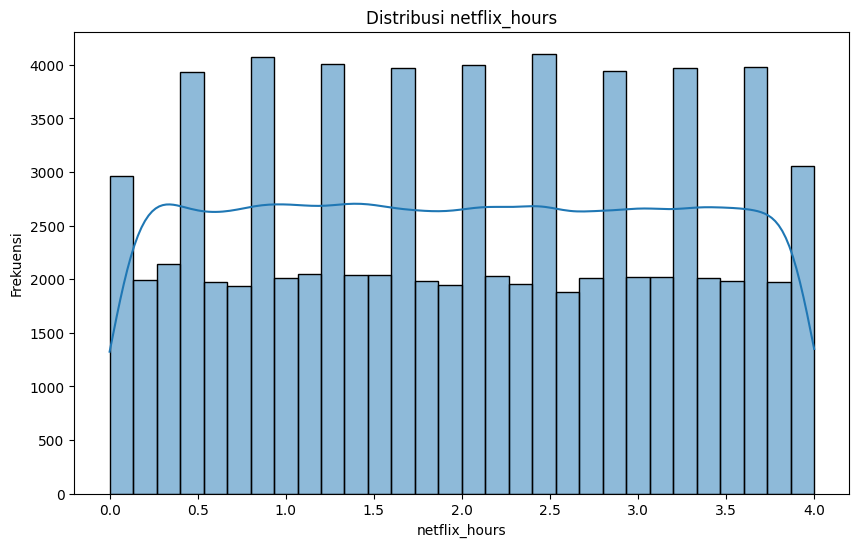

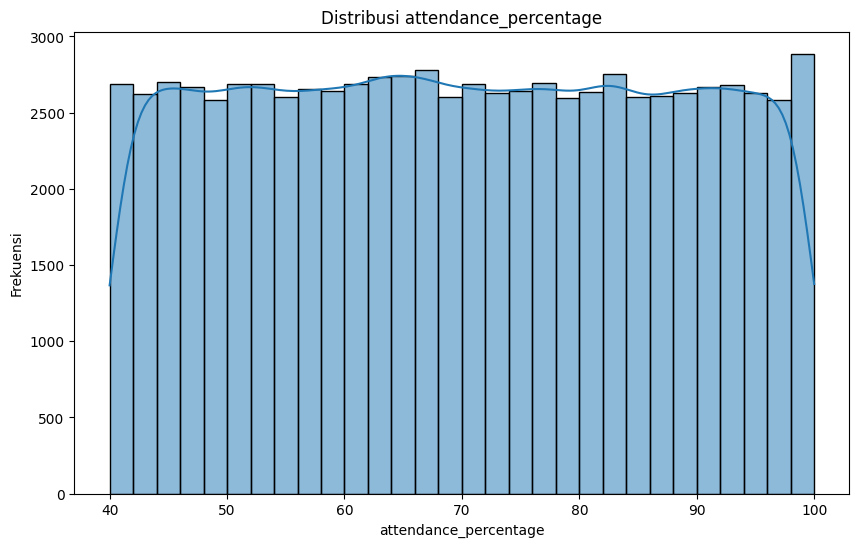

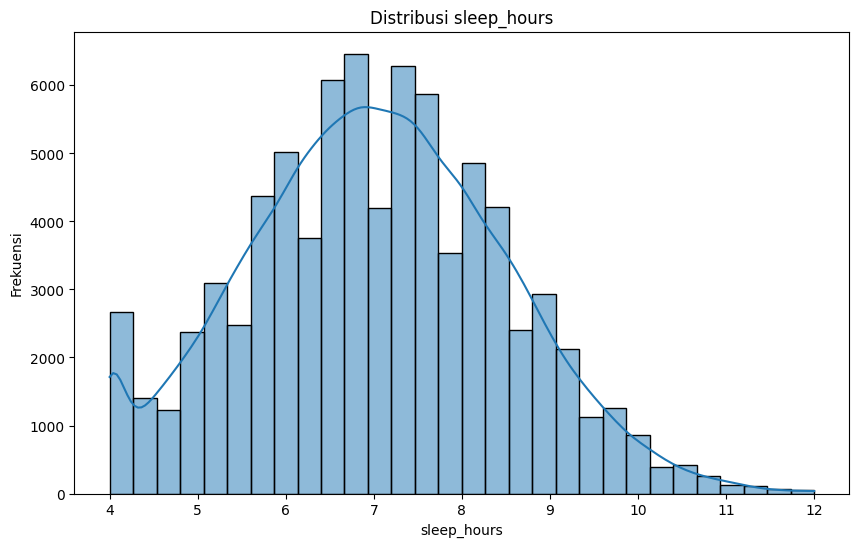

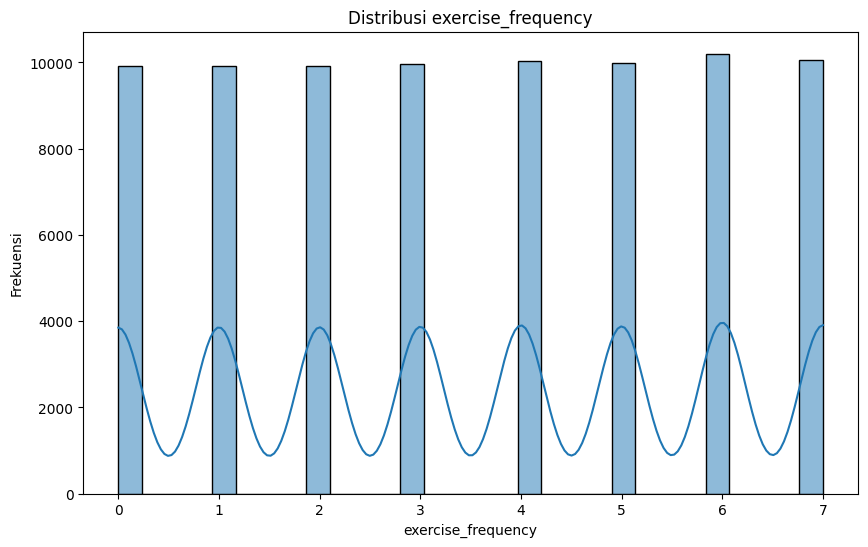

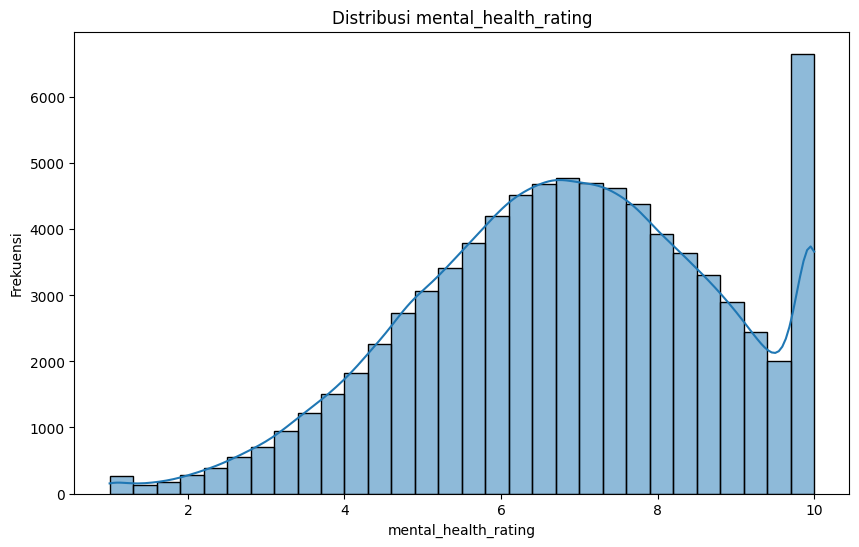

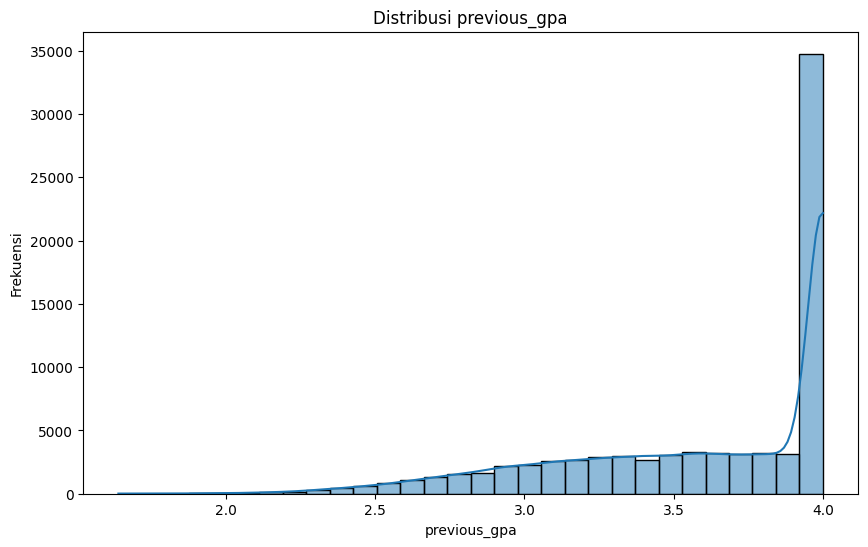

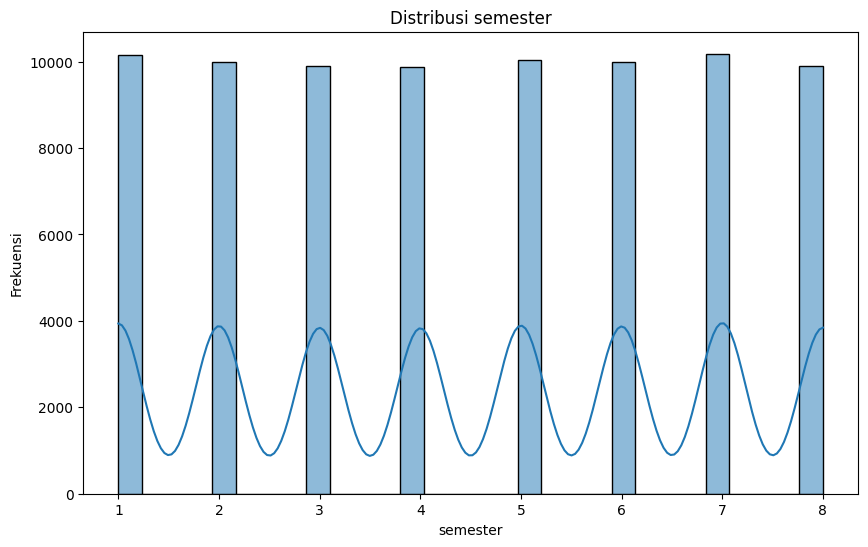

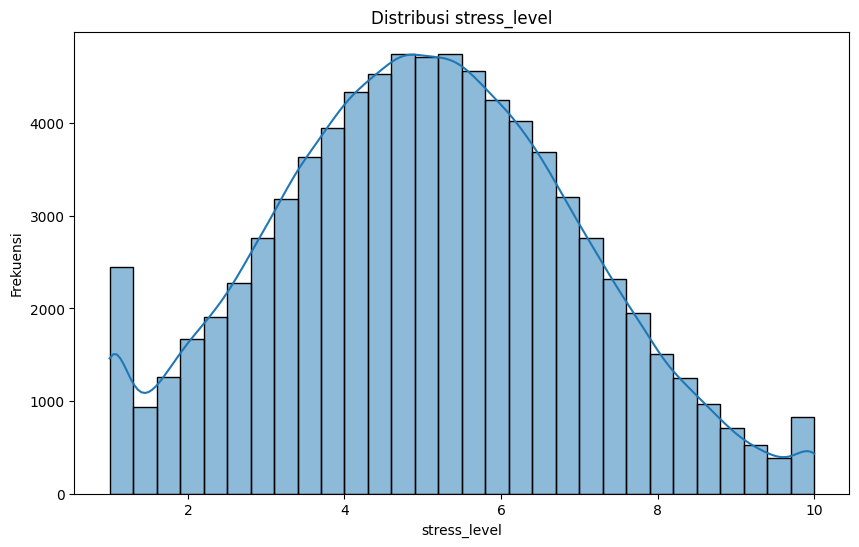

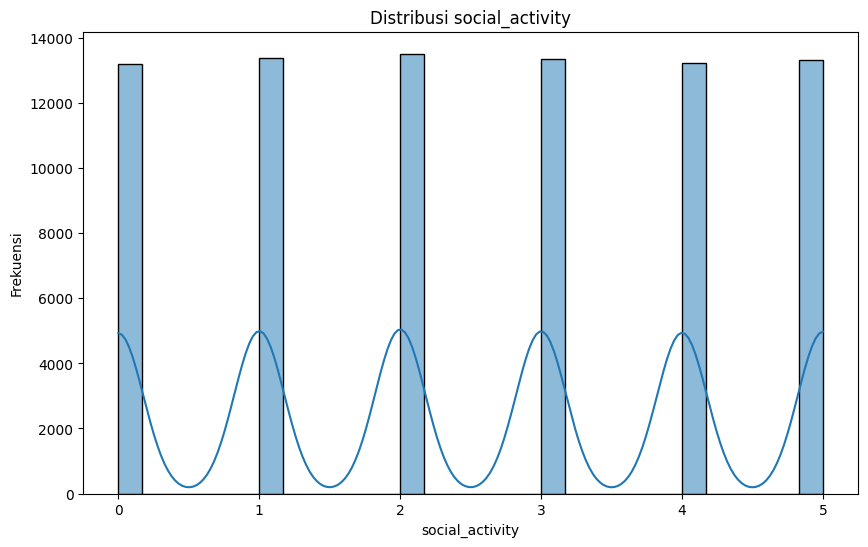

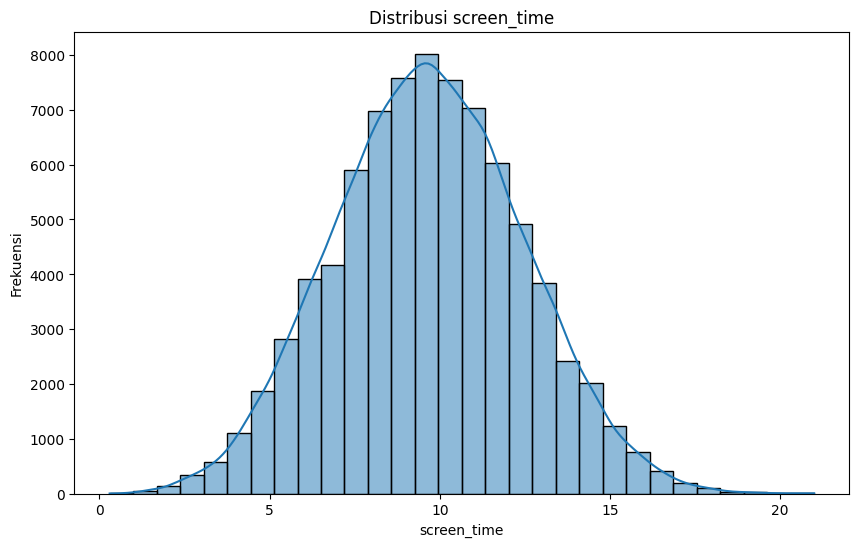

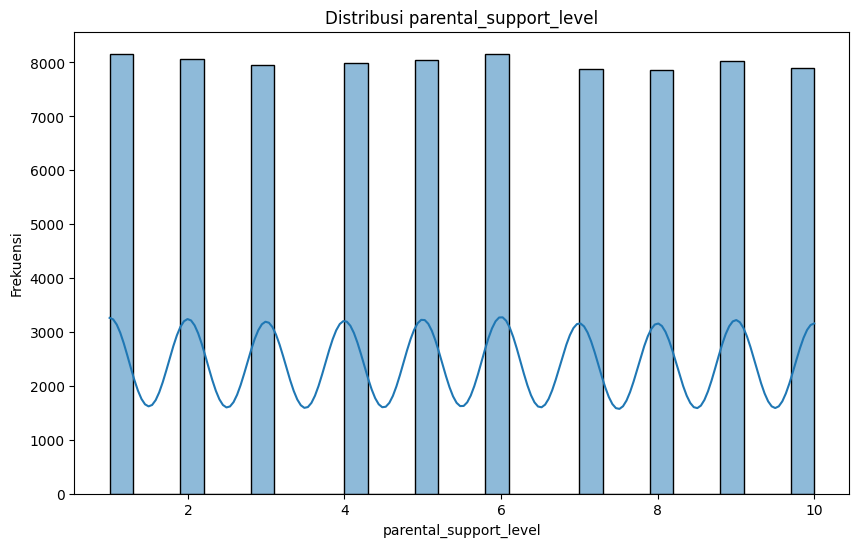

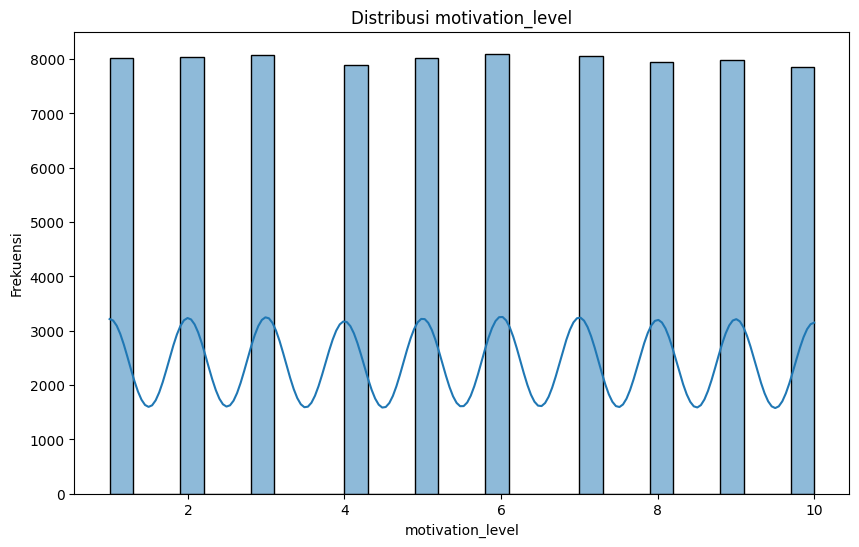

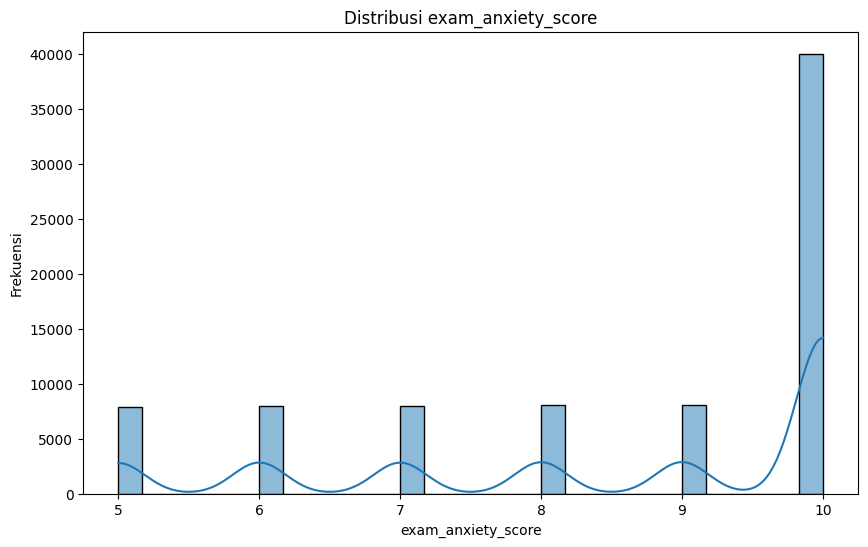

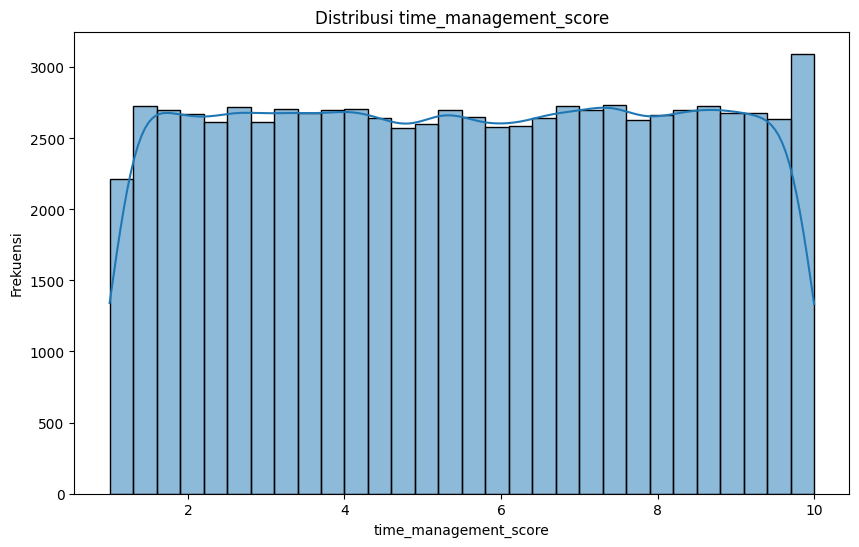

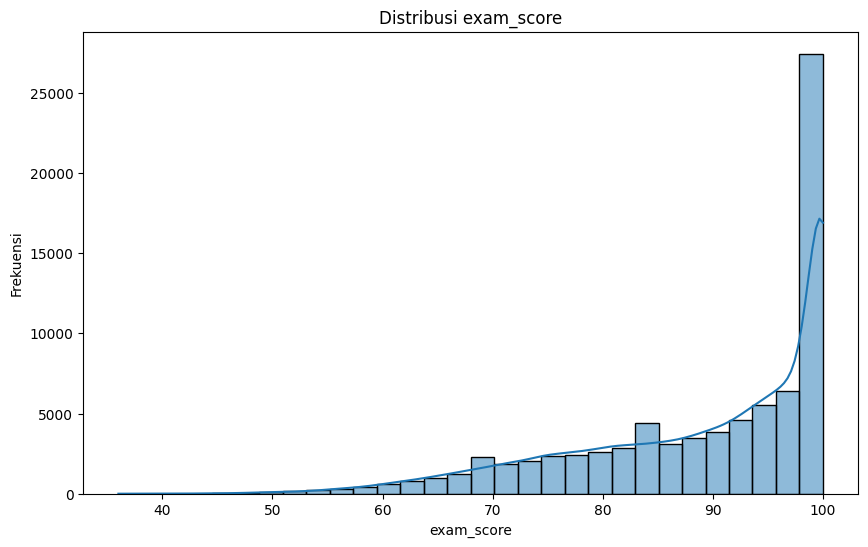

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

## Distribusi Kolom Kategorikal

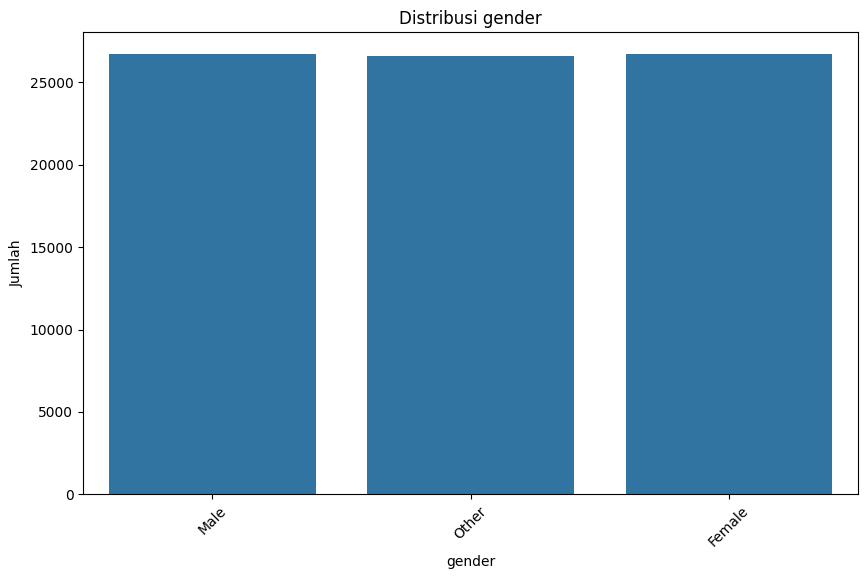

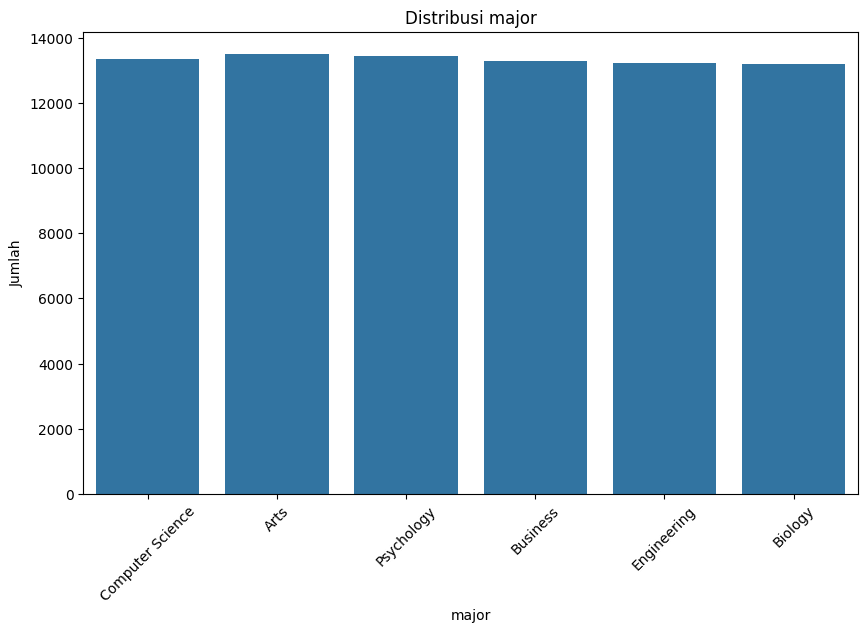

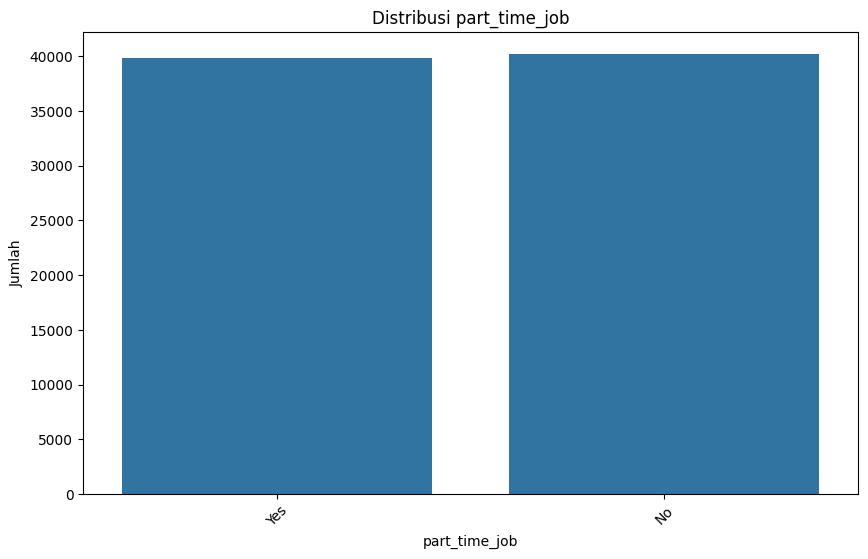

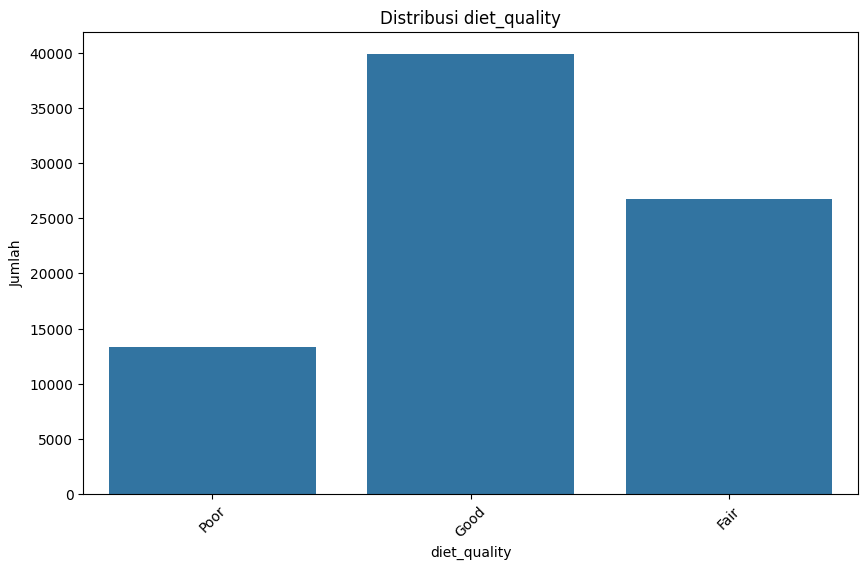

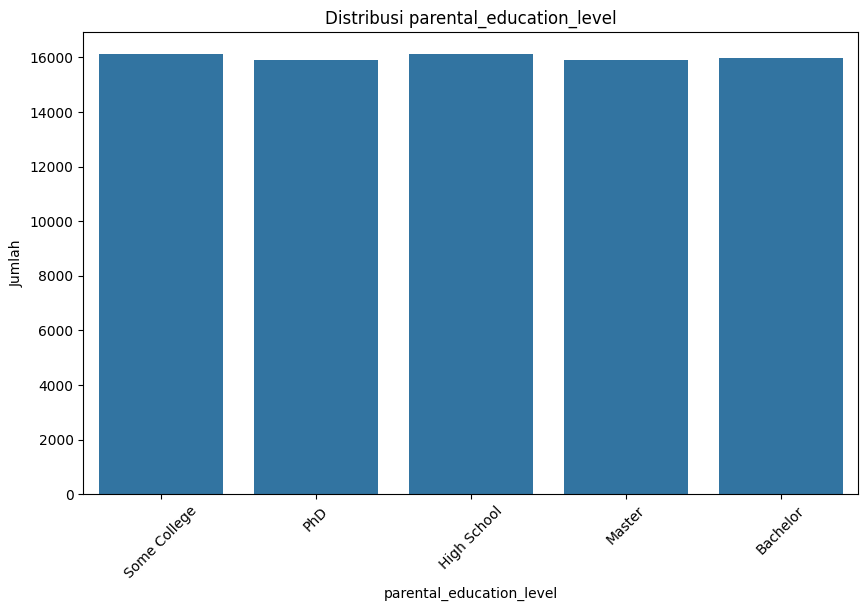

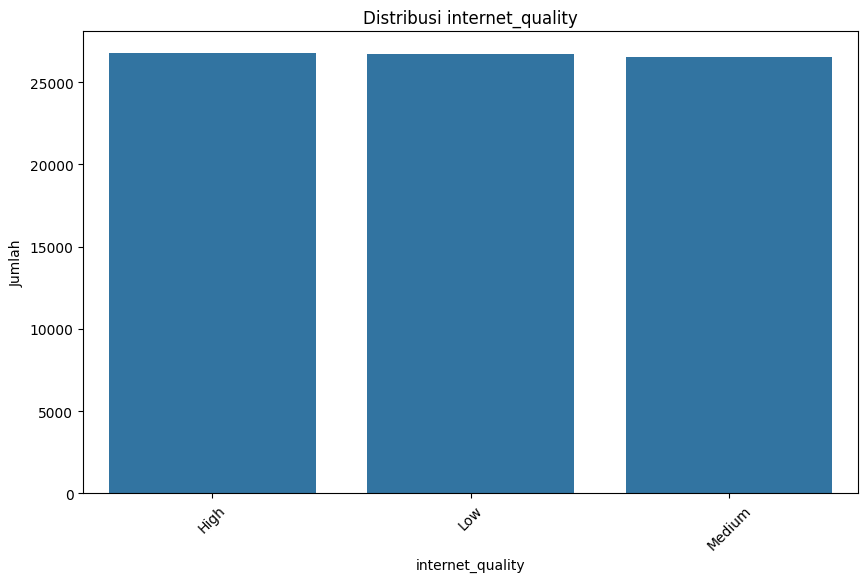

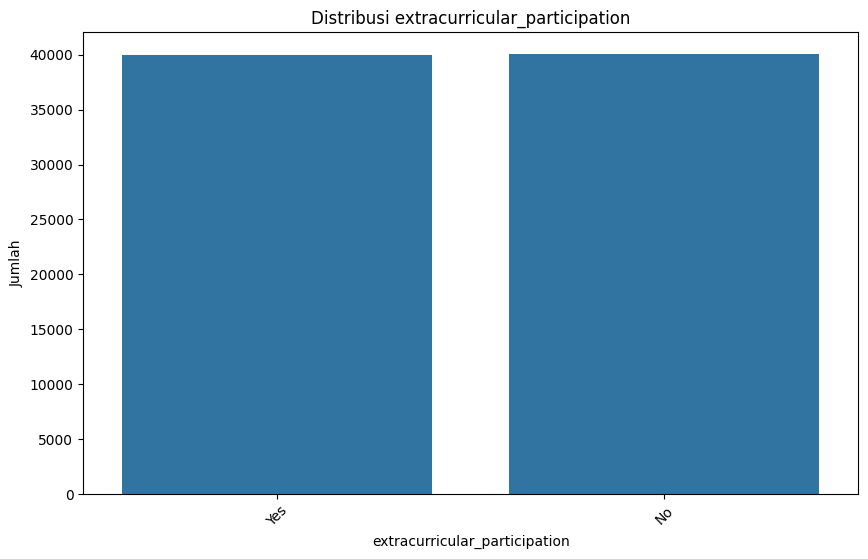

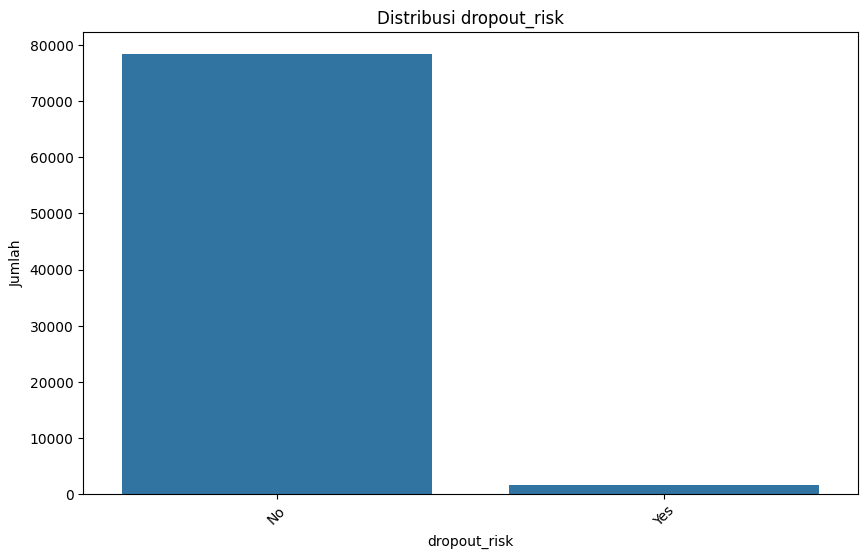

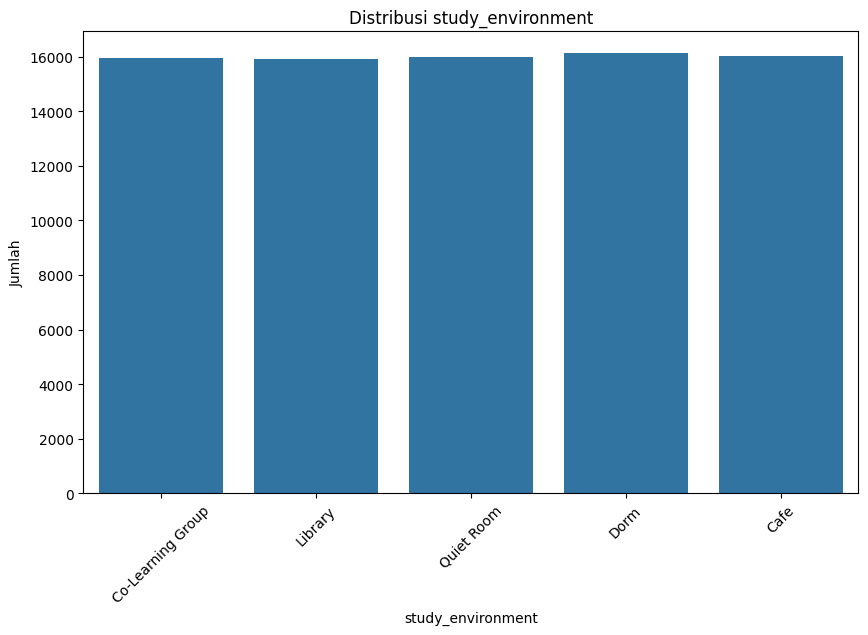

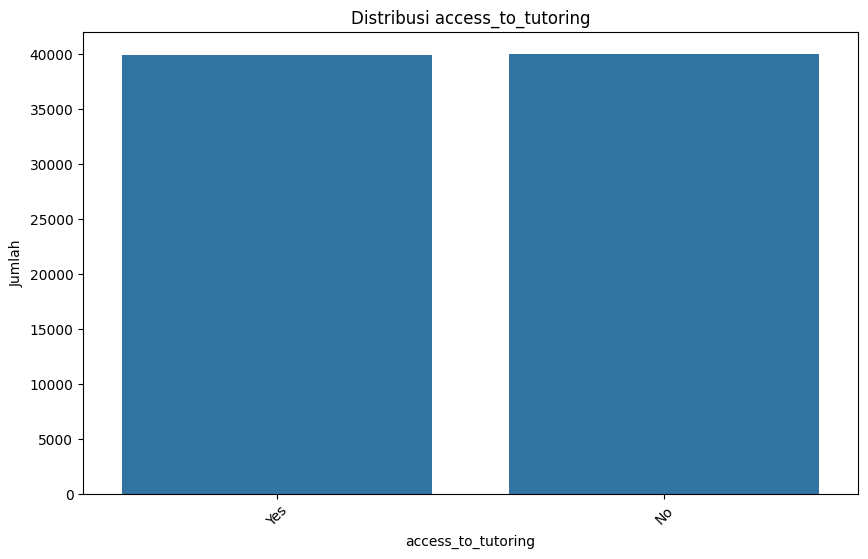

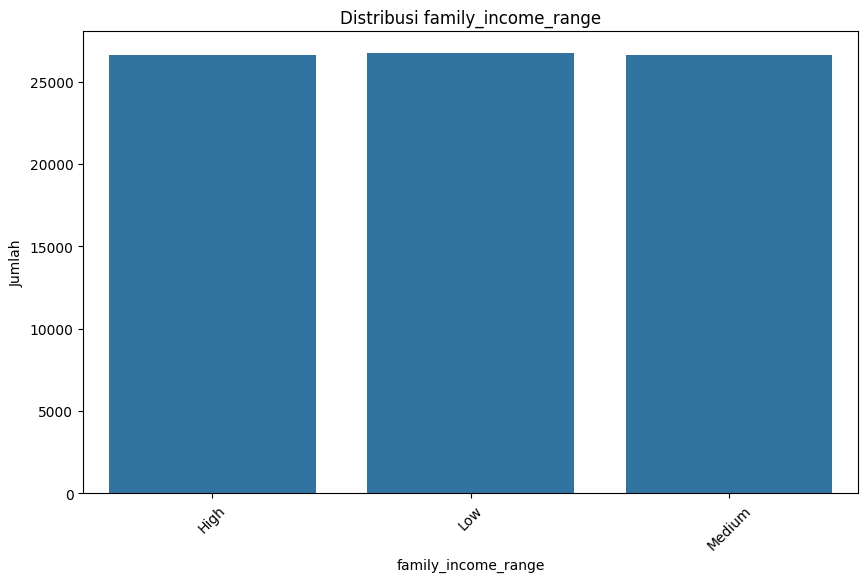

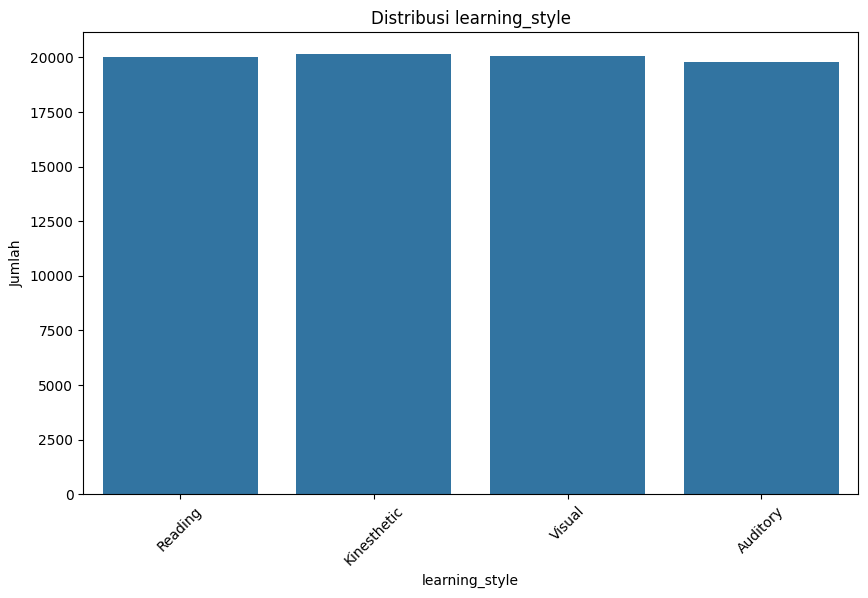

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

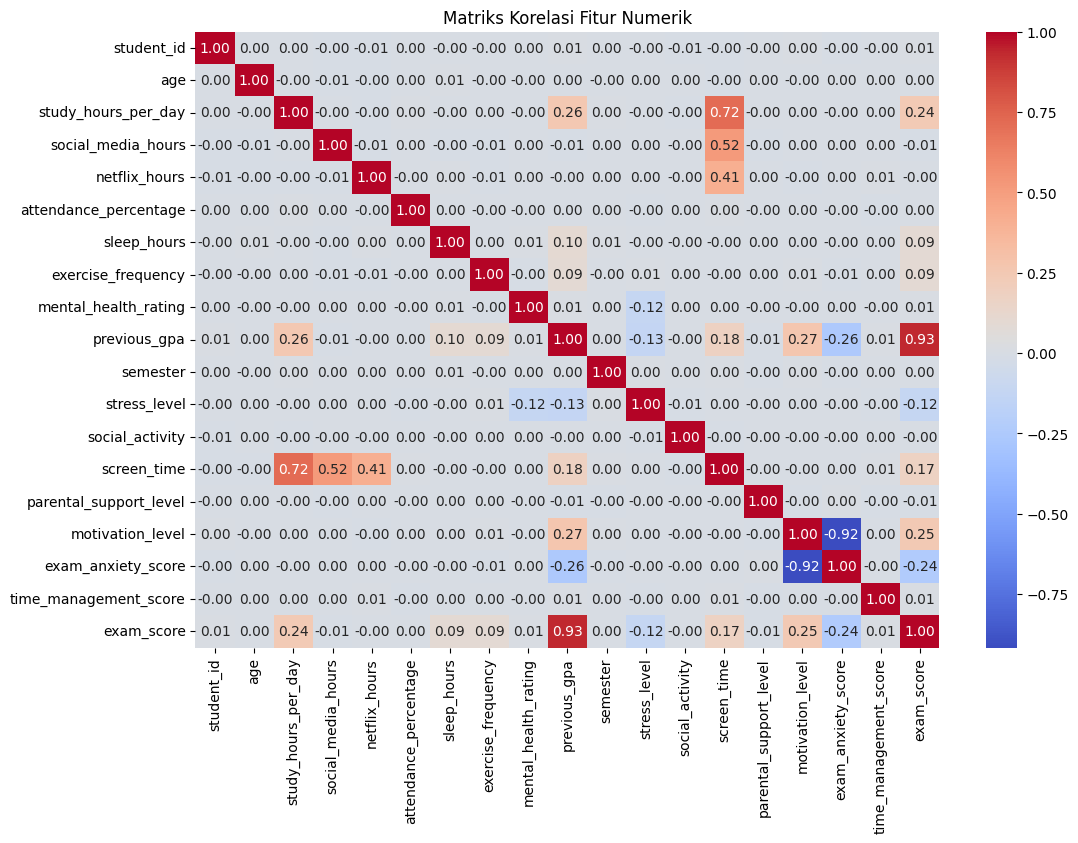

In [17]:
# Analisis Korelasi (untuk kolom numerik)
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [18]:
# Korelasi dengan Exam Score
print("\n=== Korelasi dengan Exam Score ===")
exam_score_corr = correlation_matrix['exam_score'].sort_values(ascending=False)
print(exam_score_corr)


=== Korelasi dengan Exam Score ===
exam_score                1.000000
previous_gpa              0.932940
motivation_level          0.250287
study_hours_per_day       0.241460
screen_time               0.169788
sleep_hours               0.090820
exercise_frequency        0.086983
mental_health_rating      0.010556
student_id                0.007557
time_management_score     0.005940
attendance_percentage     0.002876
semester                  0.000541
age                       0.000487
netflix_hours            -0.001271
social_activity          -0.002795
parental_support_level   -0.006333
social_media_hours       -0.006351
stress_level             -0.118550
exam_anxiety_score       -0.235909
Name: exam_score, dtype: float64


## Boxplot untuk Deteksi Outlier pada Kolom Numerik

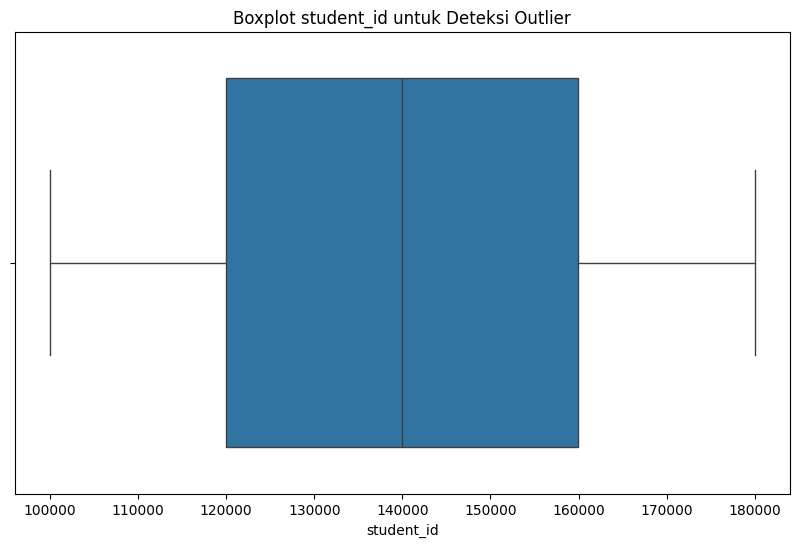

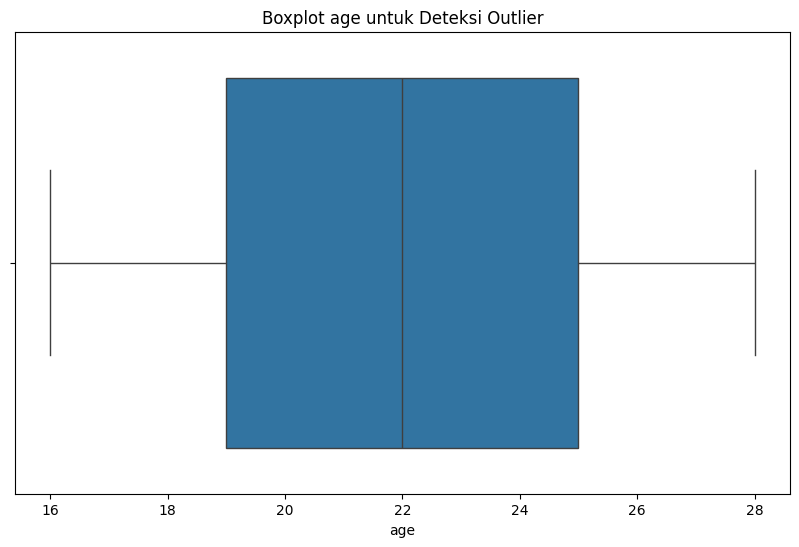

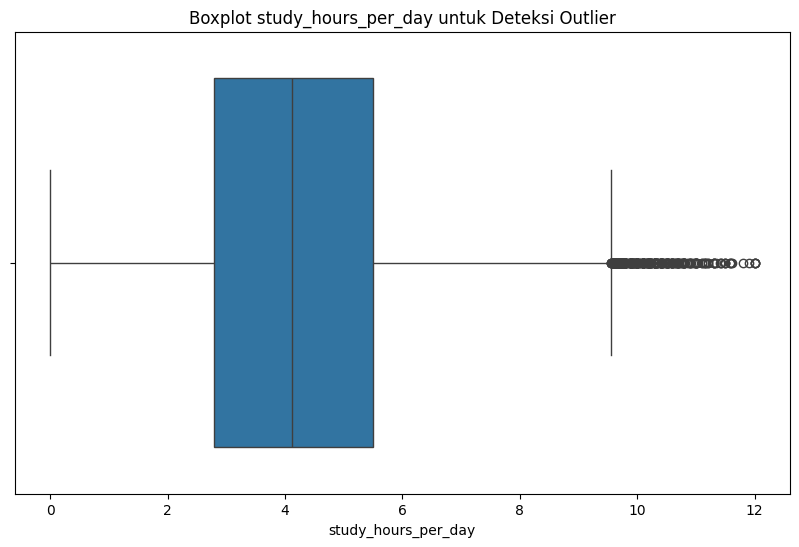

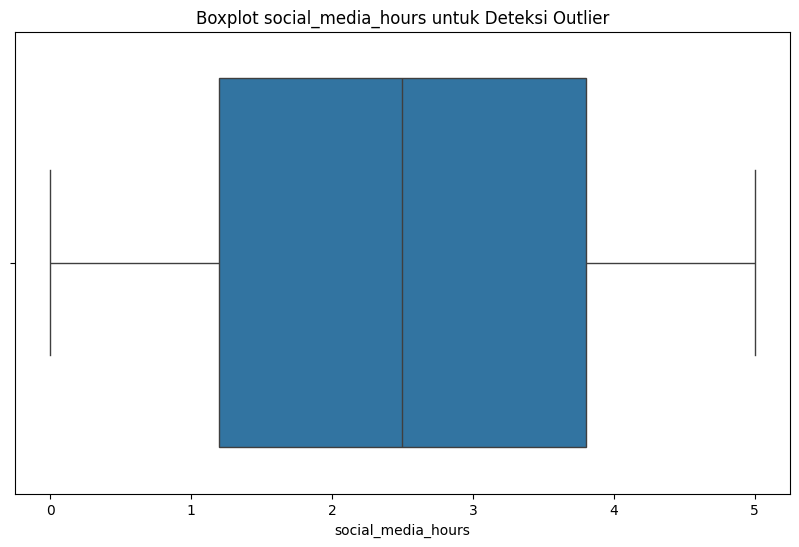

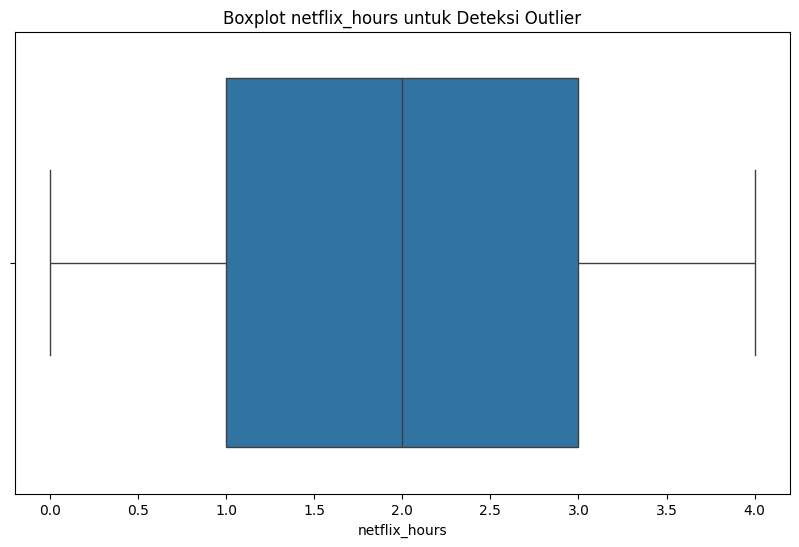

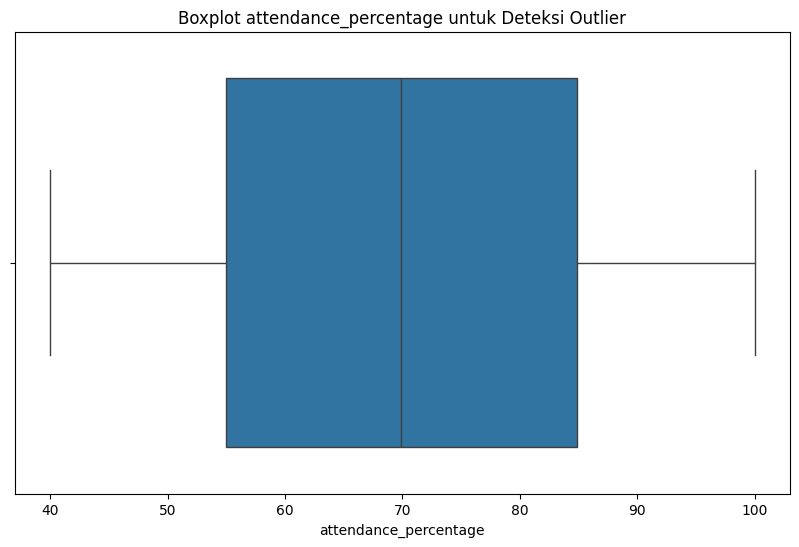

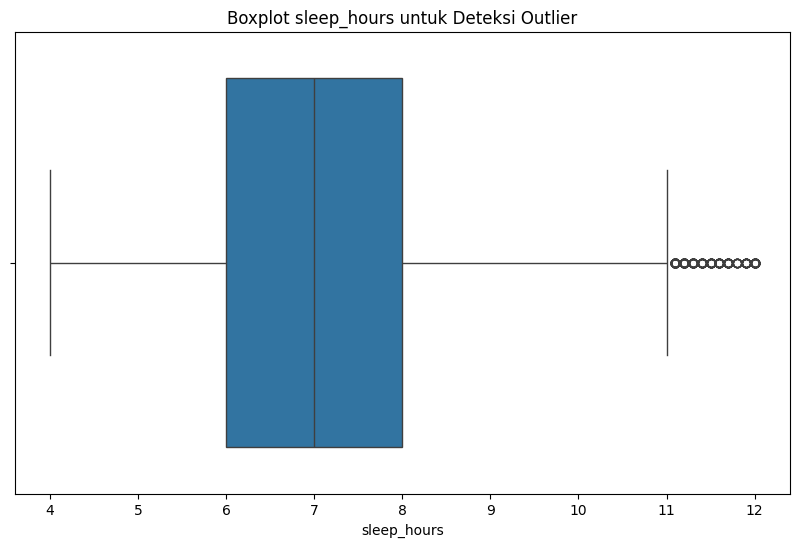

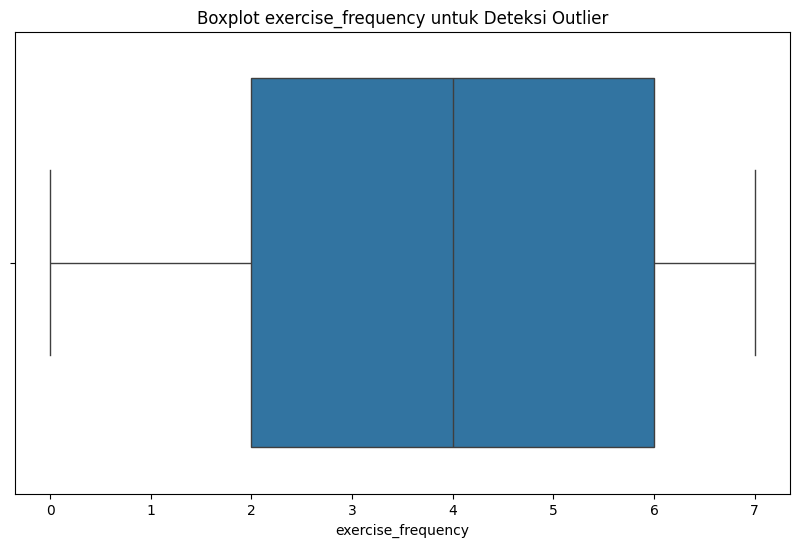

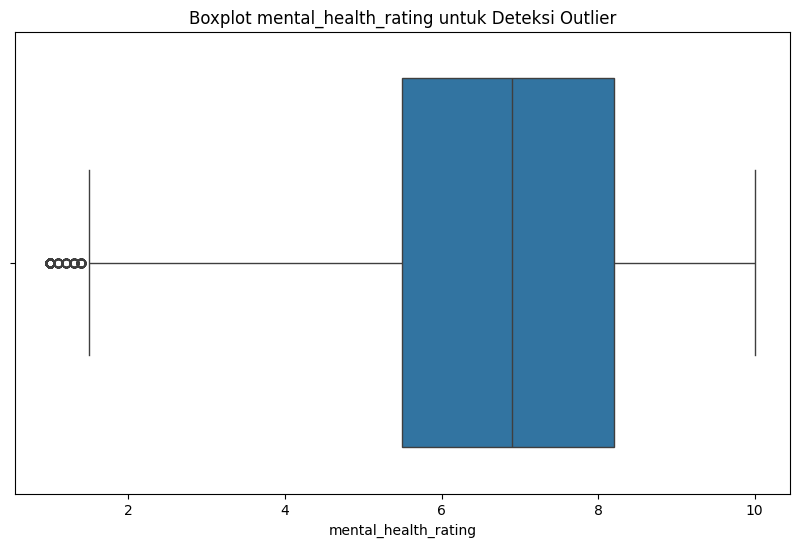

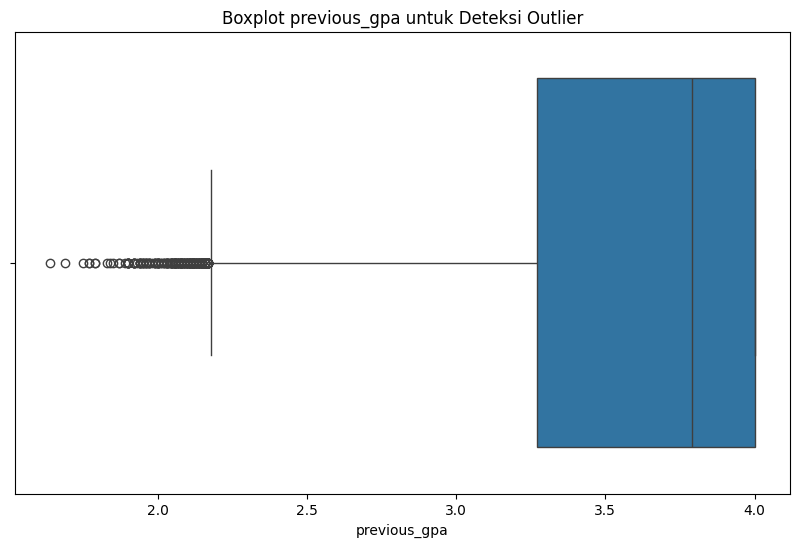

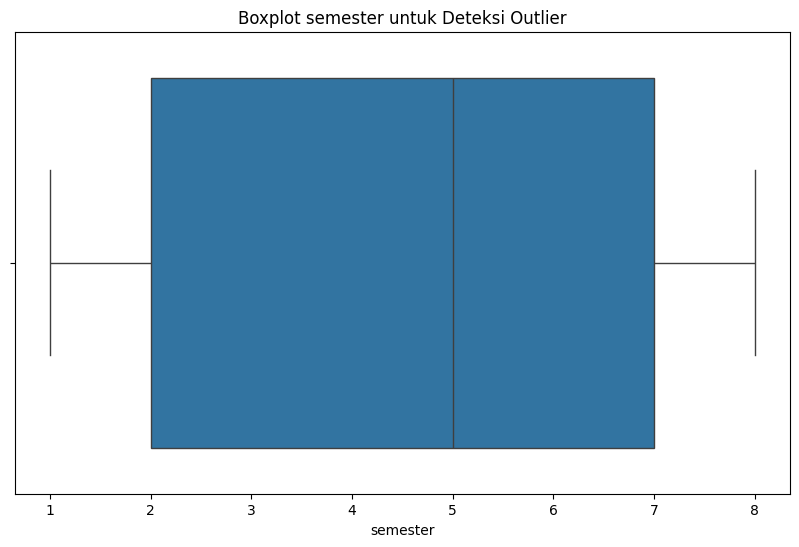

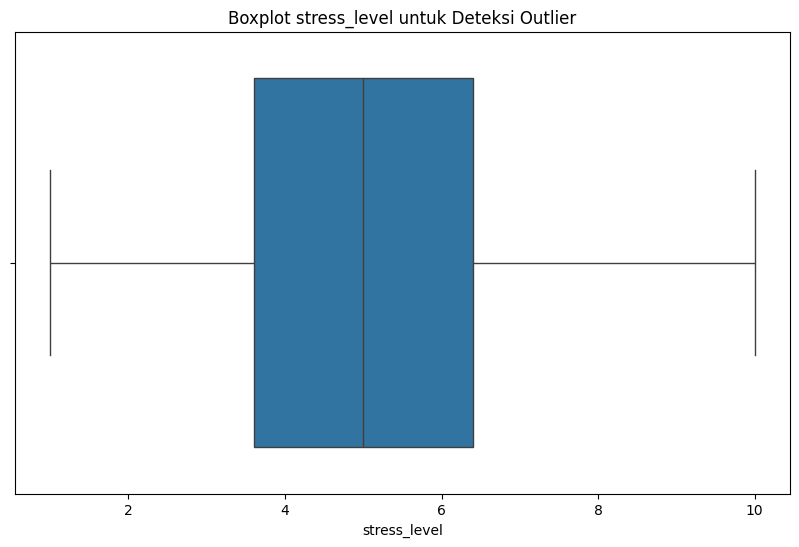

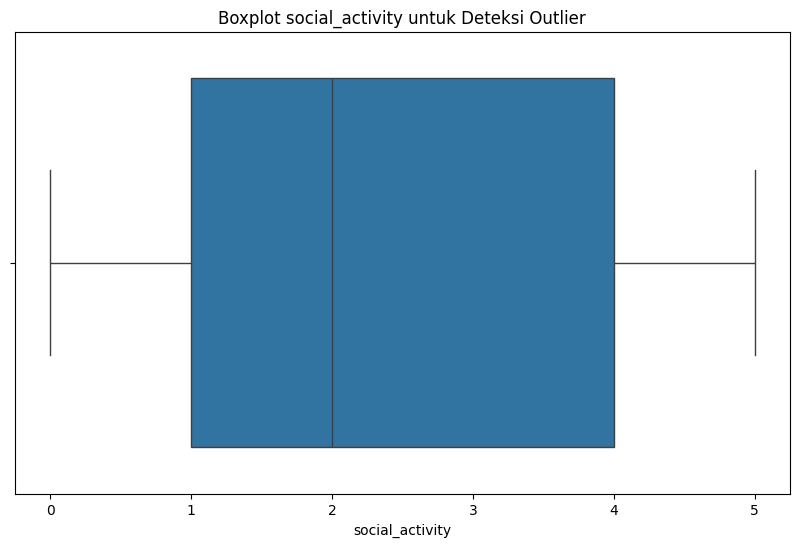

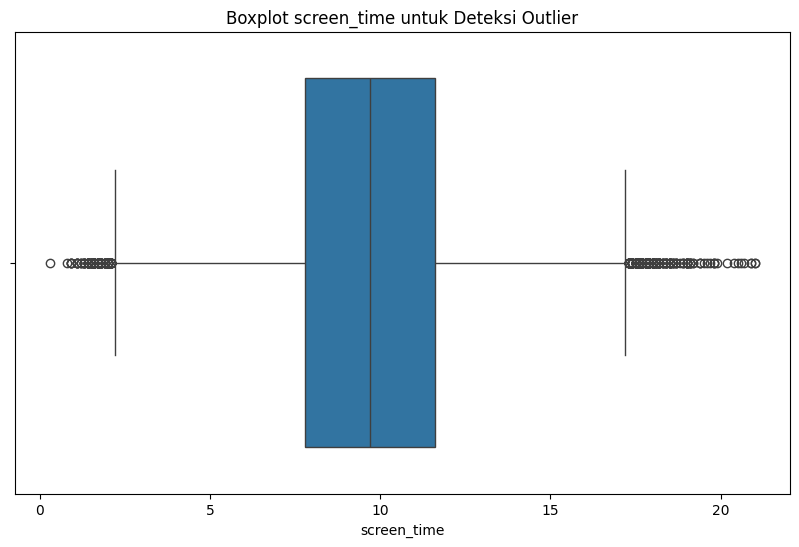

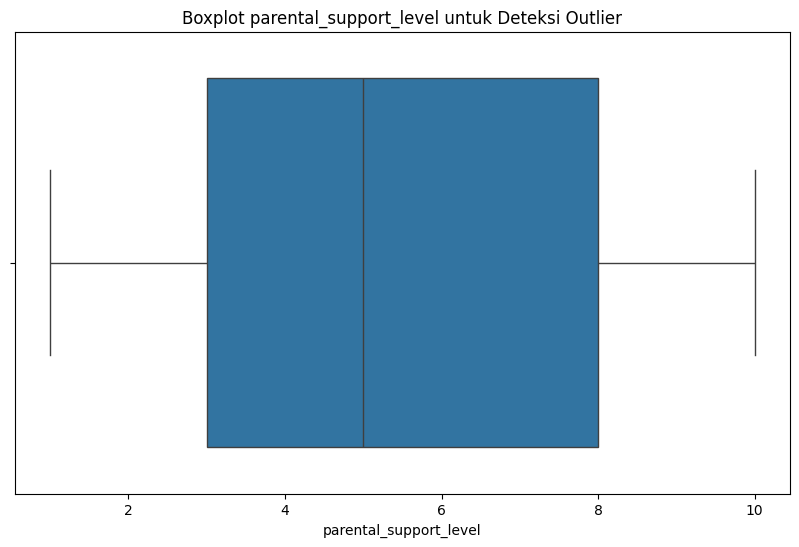

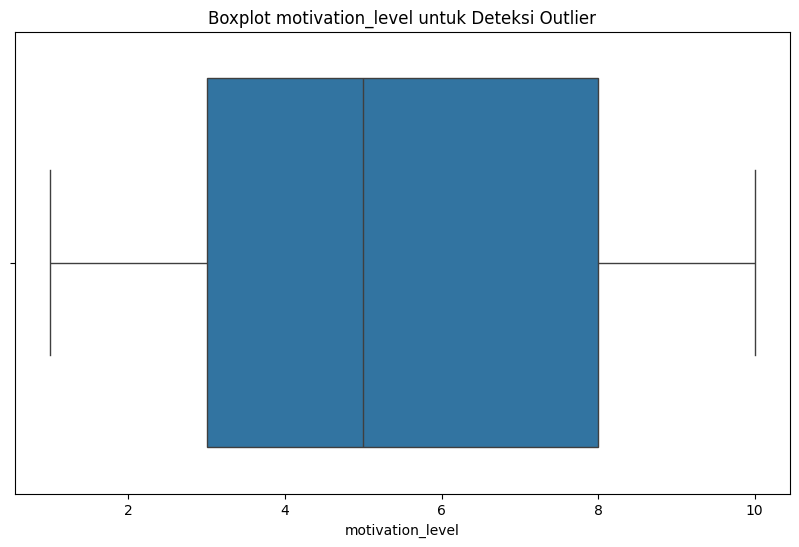

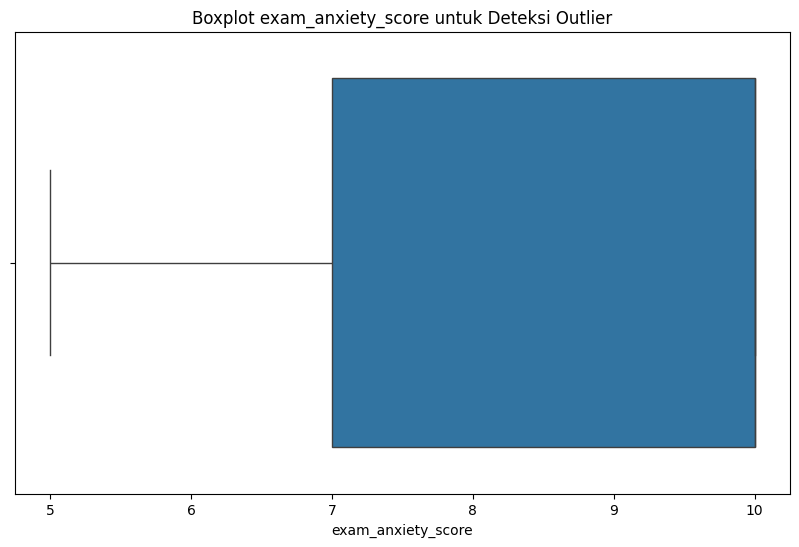

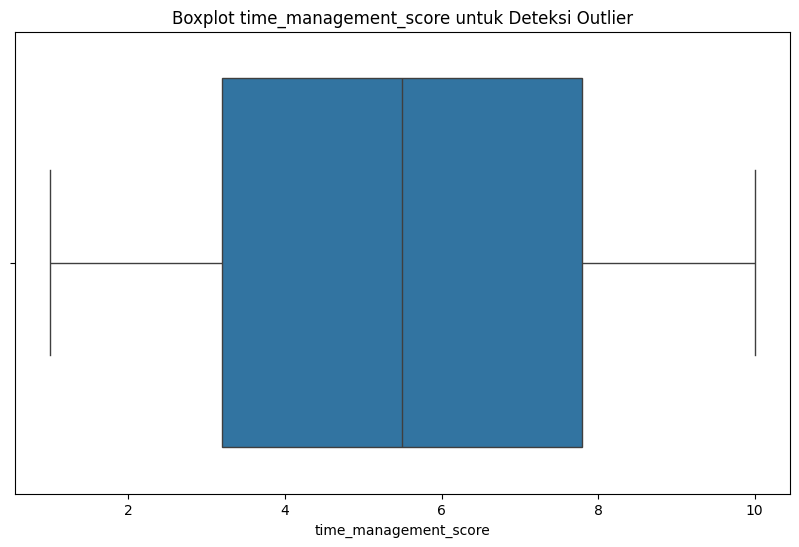

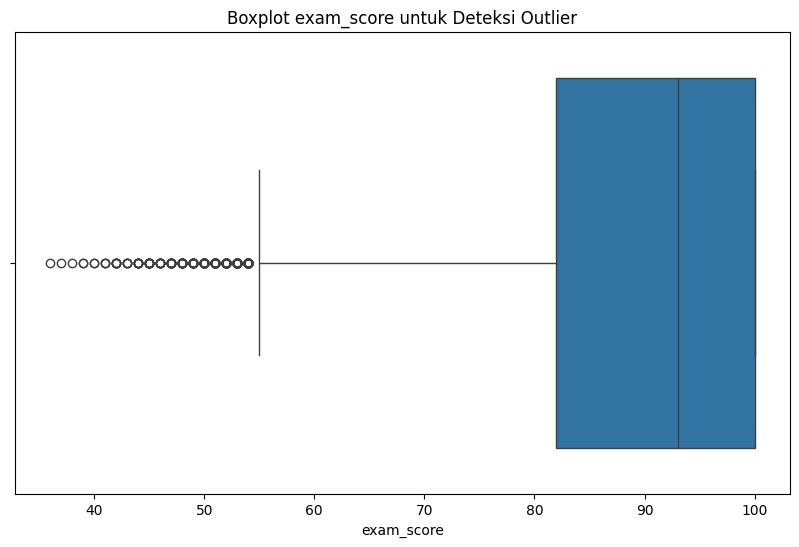

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col} untuk Deteksi Outlier')
    plt.show()

## Hubungan Fitur Kategorikal dengan Exam Score

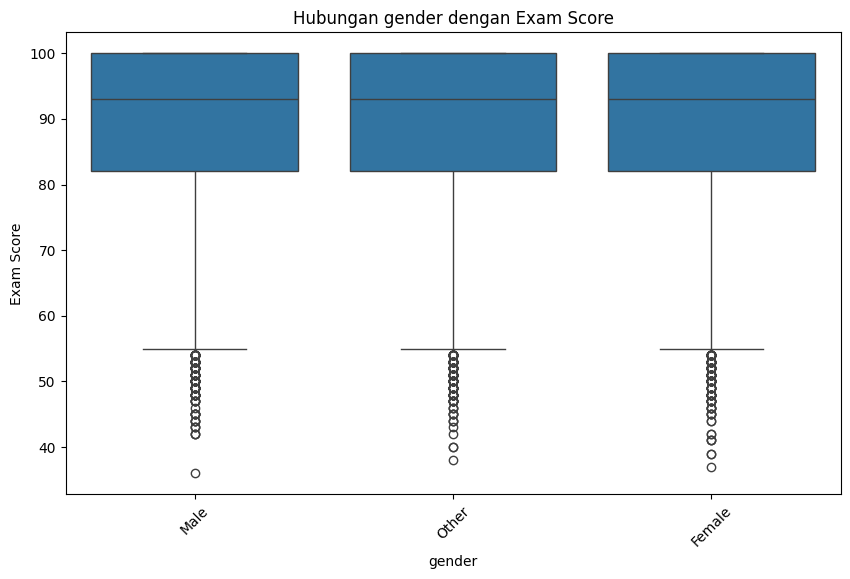

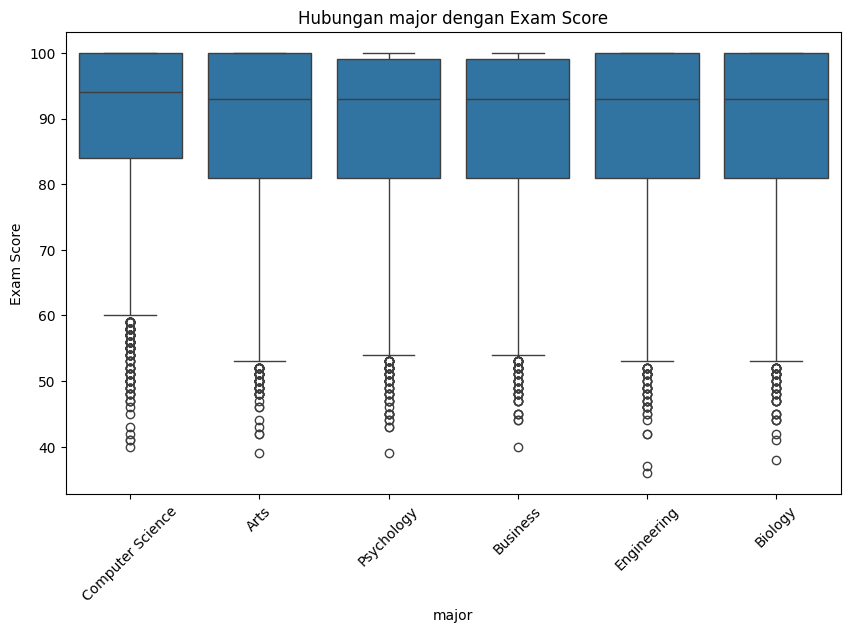

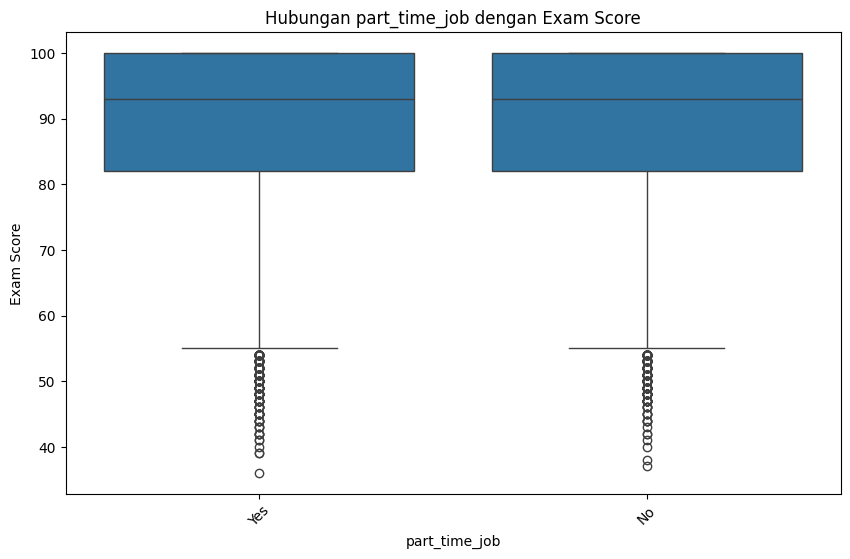

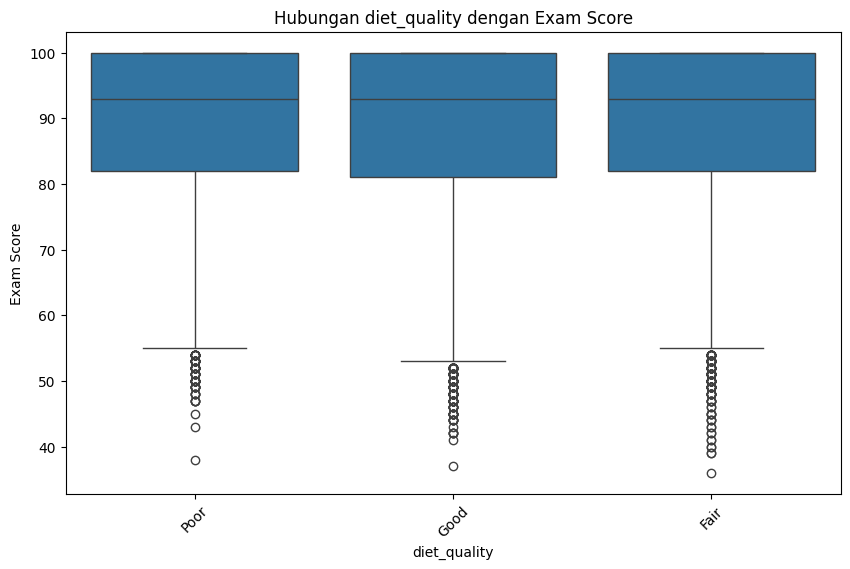

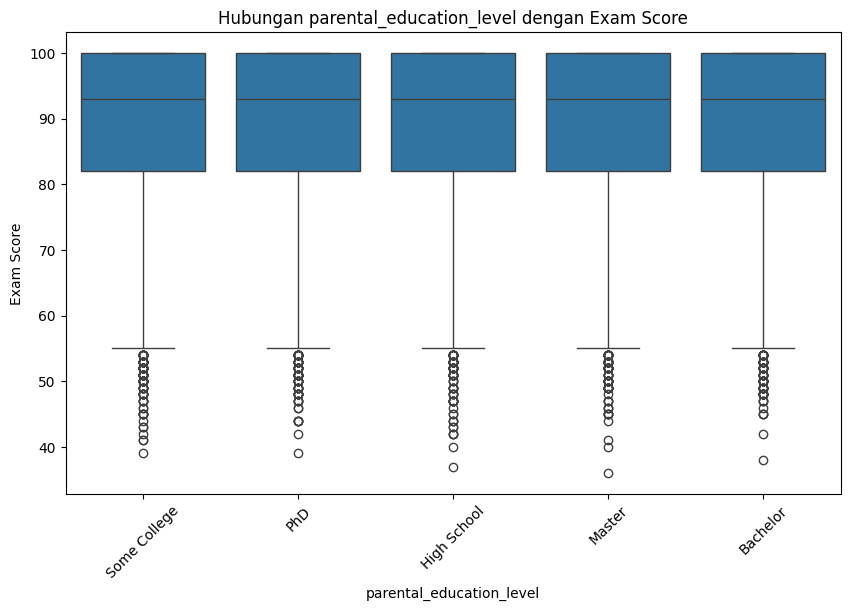

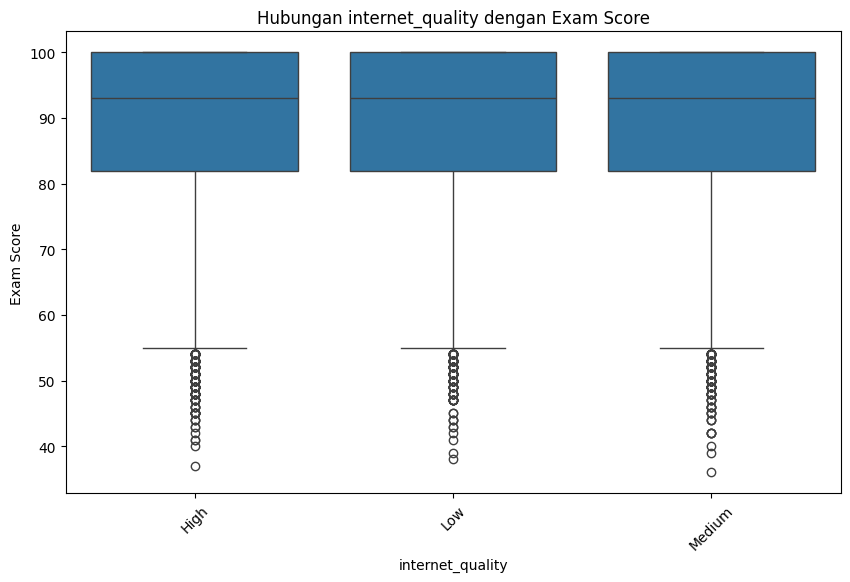

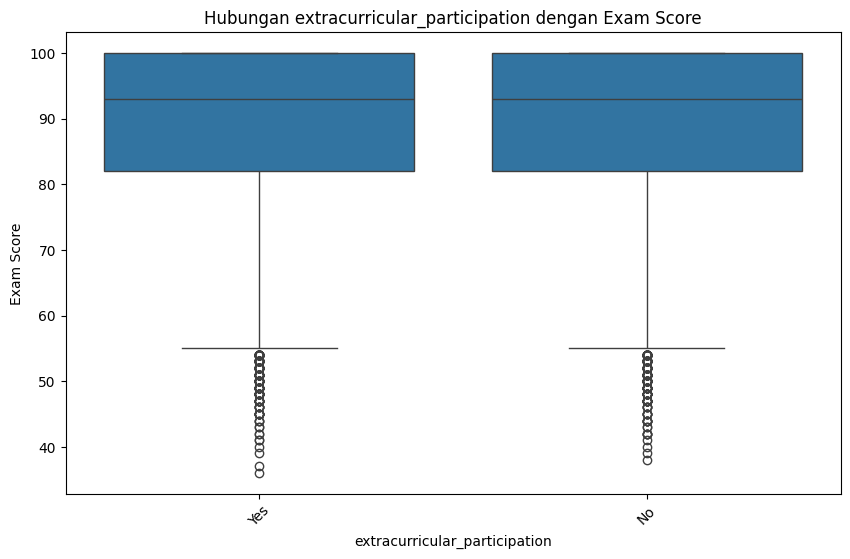

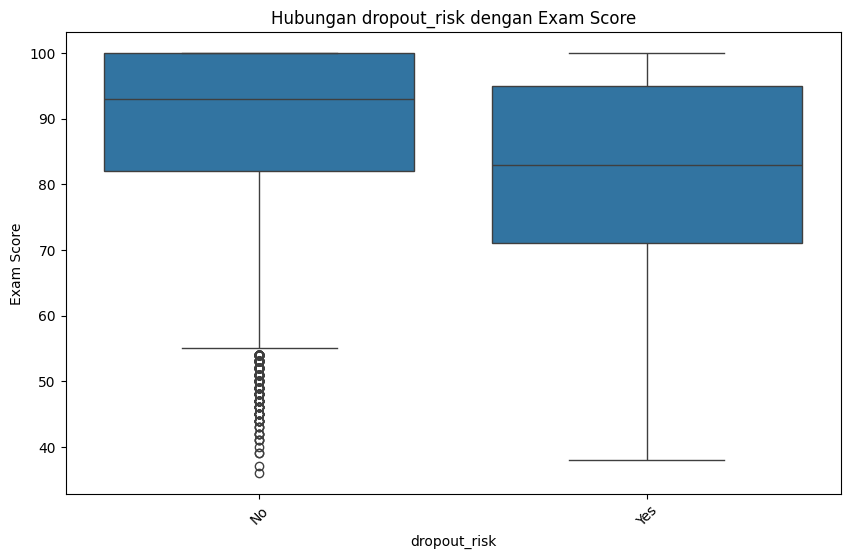

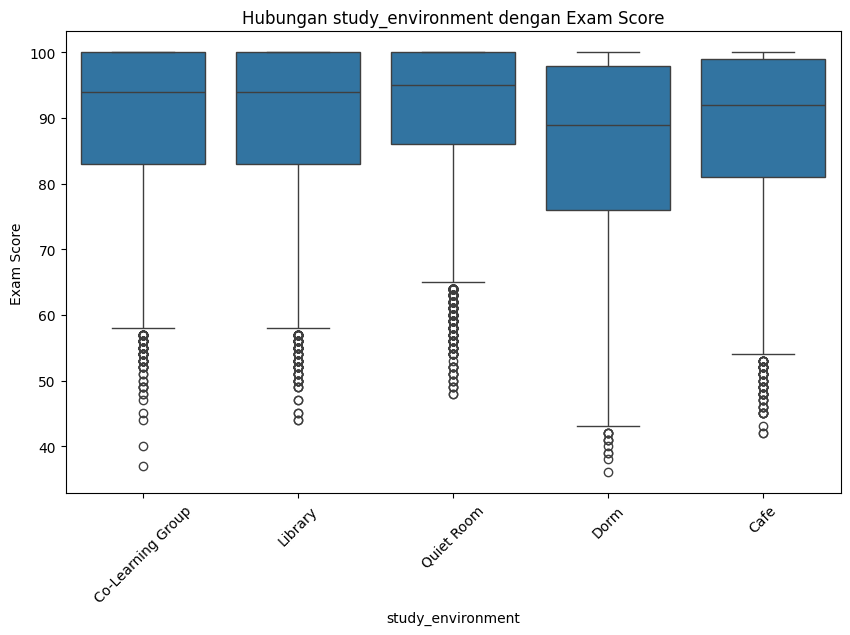

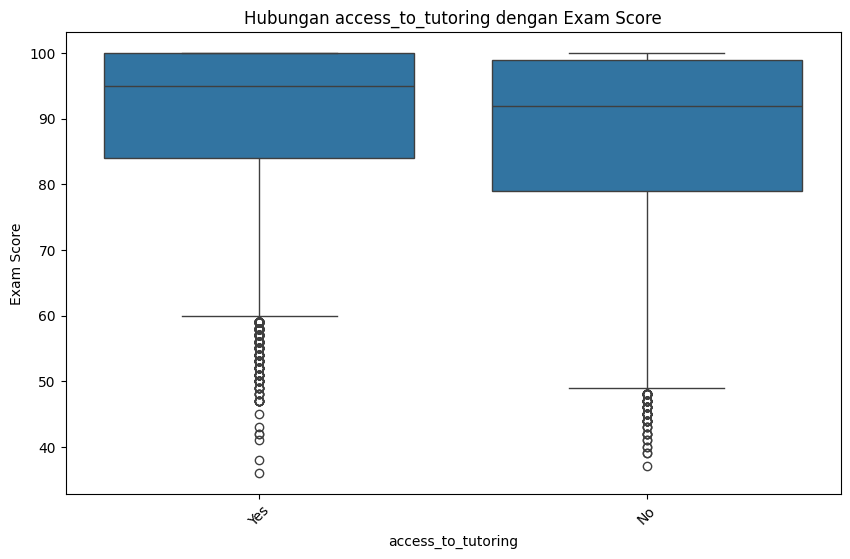

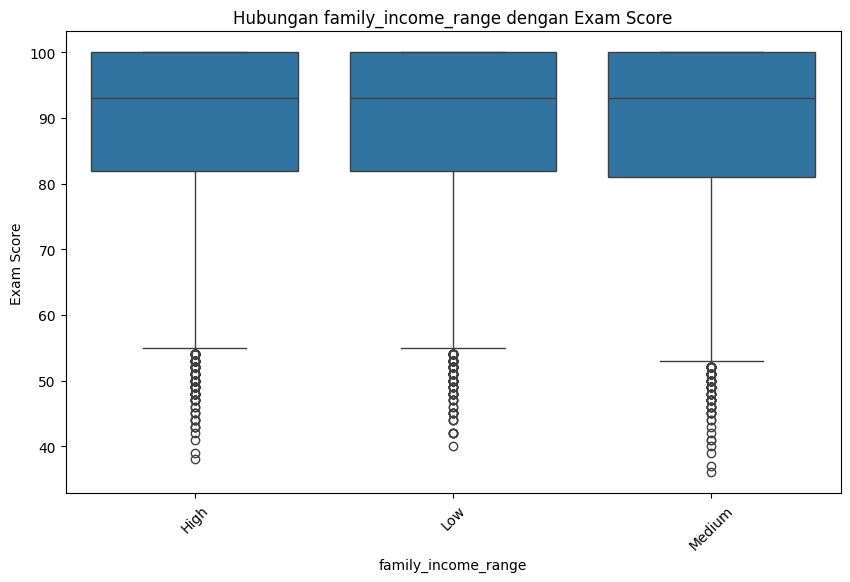

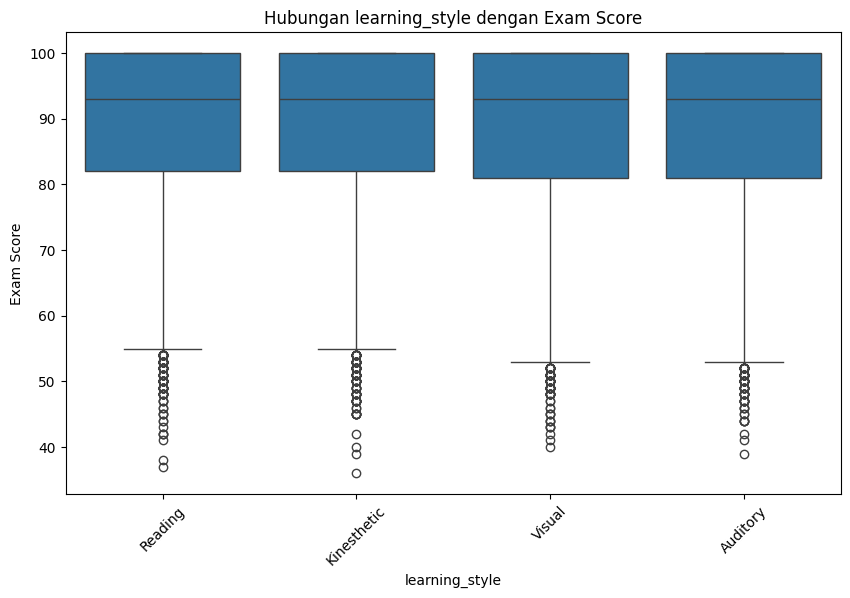

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col], y=data['exam_score'])
    plt.title(f'Hubungan {col} dengan Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.xticks(rotation=45)
    plt.show()

## Ringkasan Temuan

In [ ]:
print("\n=== Ringkasan Temuan ===")
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")
print(f"Kolom dengan nilai hilang: {missing_values[missing_values > 0].index.tolist()}")
print(f"Fitur dengan korelasi tinggi terhadap exam_score: {exam_score_corr[abs(exam_score_corr) > 0.3].index.tolist()}")


=== Ringkasan Temuan ===
Jumlah baris: 80000
Jumlah kolom: 31
Kolom dengan nilai hilang: []
Fitur dengan korelasi tinggi terhadap exam_score: ['exam_score', 'previous_gpa']
